In [155]:
import networkx as nx
import graficas as g
import entropia as en
import matplotlib.pyplot as plt
import time
import importlib
import numpy as np

In [117]:
n=1000
m=15
num_simulaciones=1
q_enteros=[2,3,4,5,6,7,8,9,10]
q_decimales=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

In [118]:
importlib.reload(en)
importlib.reload(g)

<module 'graficas' from 'C:\\proyectos\\repositorios\\pt_robustez\\graficas.py'>

In [140]:
entropia_BA_fallos_enteros= {i: [] for i in range(1,10,1)}
entropia_WS_fallos_enteros= {i: [] for i in range(1,10,1)}
entropia_BA_fallos_decimales= {i: [] for i in range(1,10,1)}
entropia_WS_fallos_decimales= {i: [] for i in range(1,10,1)}

inicio=time.time()

for i in range(num_simulaciones):
    print(f"Estamos en la {i} simulación")
    G_BA = g.crear_grafica('barabasi',n,m,0)
    G_WS = g.crear_grafica('watts',n,2*m,0.5)
    
    G_1=G_BA.copy()
    G_2=G_WS.copy()

    for idx, q in enumerate(q_enteros, start=1):
        entropia_BA_q = []
        entropia_WS_q = []

        for j in range(N):
            entropia_BA_q.append(en.entropia_tsallis_1(G_1, q))
            entropia_WS_q.append(en.entropia_tsallis_1(G_2, q))
            G_1, _ = g.ataques(G_1, 'random')
            G_2, _ = g.ataques(G_2, 'random')

        entropia_BA_fallos_enteros[idx].append(entropia_BA_q)
        entropia_WS_fallos_enteros[idx].append(entropia_WS_q)

        G_1 = G_BA.copy()
        G_2 = G_WS.copy()

    for idx, q in enumerate(q_decimales, start=1):
        entropia_BA_q = []
        entropia_WS_q = []

        for j in range(N):
            entropia_BA_q.append(en.entropia_tsallis_1(G_1, q))
            entropia_WS_q.append(en.entropia_tsallis_1(G_2, q))
            G_1, _ = g.ataques(G_1, 'random')
            G_2, _ = g.ataques(G_2, 'random')

        entropia_BA_fallos_decimales[idx].append(entropia_BA_q)
        entropia_WS_fallos_decimales[idx].append(entropia_WS_q)

        G_1 = G_BA.copy()
        G_2 = G_WS.copy()

final = time.time()
print(f"El tiempo total de ejecución fue de {final-inicio:.2f} segundos")

Estamos en la 0 simulación
El tiempo total de ejecución fue de 29.51 segundos


In [141]:
for d in [entropia_BA_fallos_enteros, entropia_WS_fallos_enteros,
          entropia_BA_fallos_decimales, entropia_WS_fallos_decimales]:
    for k in d:
        d[k] = [sum(col) / num_simulaciones for col in zip(*d[k])]

In [142]:
entropia_BA_ataques_enteros= {i: [] for i in range(1,10,1)}
entropia_WS_ataques_enteros= {i: [] for i in range(1,10,1)}
entropia_BA_ataques_decimales= {i: [] for i in range(1,10,1)}
entropia_WS_ataques_decimales= {i: [] for i in range(1,10,1)}

inicio=time.time()

for i in range(num_simulaciones):
    print(f"Estamos en la {i} simulación")
    G_BA = g.crear_grafica('barabasi',n,m,0)
    G_WS = g.crear_grafica('watts',n,2*m,0.5)
    
    G_1=G_BA.copy()
    G_2=G_WS.copy()

    for idx, q in enumerate(q_enteros, start=1):
        entropia_BA_q = []
        entropia_WS_q = []

        for j in range(N):
            entropia_BA_q.append(en.entropia_tsallis_1(G_1, q))
            entropia_WS_q.append(en.entropia_tsallis_1(G_2, q))
            G_1, _ = g.ataques(G_1, 'degree')
            G_2, _ = g.ataques(G_2, 'degree')

        entropia_BA_ataques_enteros[idx].append(entropia_BA_q)
        entropia_WS_ataques_enteros[idx].append(entropia_WS_q)

        G_1 = G_BA.copy()
        G_2 = G_WS.copy()

    for idx, q in enumerate(q_decimales, start=1):
        entropia_BA_q = []
        entropia_WS_q = []

        for j in range(N):
            entropia_BA_q.append(en.entropia_tsallis_1(G_1, q))
            entropia_WS_q.append(en.entropia_tsallis_1(G_2, q))
            G_1, _ = g.ataques(G_1, 'degree')
            G_2, _ = g.ataques(G_2, 'degree')

        entropia_BA_ataques_decimales[idx].append(entropia_BA_q)
        entropia_WS_ataques_decimales[idx].append(entropia_WS_q)

        G_1 = G_BA.copy()
        G_2 = G_WS.copy()

final = time.time()
print(f"El tiempo total de ejecución fue de {final-inicio:.2f} segundos")

Estamos en la 0 simulación
El tiempo total de ejecución fue de 38.52 segundos


In [143]:
for d in [entropia_BA_ataques_enteros, entropia_WS_ataques_enteros,
          entropia_BA_ataques_decimales, entropia_WS_ataques_decimales]:
    for k in d:
        d[k] = [sum(col) / num_simulaciones for col in zip(*d[k])]

In [144]:
tsallis_1_BA_fallos_enteros = entropia_BA_fallos_enteros
tsallis_1_WS_fallos_enteros = entropia_WS_fallos_enteros
tsallis_1_BA_fallos_decimales = entropia_BA_fallos_decimales
tsallis_1_WS_fallos_decimales = entropia_WS_fallos_decimales

tsallis_1_BA_ataques_enteros = entropia_BA_ataques_enteros
tsallis_1_WS_ataques_enteros = entropia_WS_ataques_enteros
tsallis_1_BA_ataques_decimales = entropia_BA_ataques_decimales
tsallis_1_WS_ataques_decimales = entropia_WS_ataques_decimales

In [124]:
entropia_BA_fallos_enteros= {i: [] for i in range(1,10,1)}
entropia_WS_fallos_enteros= {i: [] for i in range(1,10,1)}
entropia_BA_fallos_decimales= {i: [] for i in range(1,10,1)}
entropia_WS_fallos_decimales= {i: [] for i in range(1,10,1)}

inicio=time.time()

for i in range(num_simulaciones):
    print(f"Estamos en la {i} simulación")
    G_BA = g.crear_grafica('barabasi',n,m,0)
    G_WS = g.crear_grafica('watts',n,2*m,0.5)
    
    G_1=G_BA.copy()
    G_2=G_WS.copy()

    for idx, q in enumerate(q_enteros, start=1):
        entropia_BA_q = []
        entropia_WS_q = []

        for j in range(N):
            entropia_BA_q.append(en.entropia_tsallis_2(G_1, q))
            entropia_WS_q.append(en.entropia_tsallis_2(G_2, q))
            G_1, _ = g.ataques(G_1, 'random')
            G_2, _ = g.ataques(G_2, 'random')

        entropia_BA_fallos_enteros[idx].append(entropia_BA_q)
        entropia_WS_fallos_enteros[idx].append(entropia_WS_q)

        G_1 = G_BA.copy()
        G_2 = G_WS.copy()

    for idx, q in enumerate(q_decimales, start=1):
        entropia_BA_q = []
        entropia_WS_q = []

        for j in range(N):
            entropia_BA_q.append(en.entropia_tsallis_2(G_1, q))
            entropia_WS_q.append(en.entropia_tsallis_2(G_2, q))
            G_1, _ = g.ataques(G_1, 'random')
            G_2, _ = g.ataques(G_2, 'random')

        entropia_BA_fallos_decimales[idx].append(entropia_BA_q)
        entropia_WS_fallos_decimales[idx].append(entropia_WS_q)

        G_1 = G_BA.copy()
        G_2 = G_WS.copy()

final = time.time()
print(f"El tiempo total de ejecución fue de {final-inicio:.2f} segundos")

Estamos en la 0 simulación
El tiempo total de ejecución fue de 24.21 segundos


In [125]:
for d in [entropia_BA_fallos_enteros, entropia_WS_fallos_enteros,
          entropia_BA_fallos_decimales, entropia_WS_fallos_decimales]:
    for k in d:
        d[k] = [sum(col) / num_simulaciones for col in zip(*d[k])]

In [126]:
entropia_BA_ataques_enteros= {i: [] for i in range(1,10,1)}
entropia_WS_ataques_enteros= {i: [] for i in range(1,10,1)}
entropia_BA_ataques_decimales= {i: [] for i in range(1,10,1)}
entropia_WS_ataques_decimales= {i: [] for i in range(1,10,1)}

inicio=time.time()

for i in range(num_simulaciones):
    print(f"Estamos en la {i} simulación")
    G_BA = g.crear_grafica('barabasi',n,m,0)
    G_WS = g.crear_grafica('watts',n,2*m,0.5)
    
    G_1=G_BA.copy()
    G_2=G_WS.copy()

    for idx, q in enumerate(q_enteros, start=1):
        entropia_BA_q = []
        entropia_WS_q = []

        for j in range(N):
            entropia_BA_q.append(en.entropia_tsallis_2(G_1, q))
            entropia_WS_q.append(en.entropia_tsallis_2(G_2, q))
            G_1, _ = g.ataques(G_1, 'degree')
            G_2, _ = g.ataques(G_2, 'degree')

        entropia_BA_ataques_enteros[idx].append(entropia_BA_q)
        entropia_WS_ataques_enteros[idx].append(entropia_WS_q)

        G_1 = G_BA.copy()
        G_2 = G_WS.copy()

    for idx, q in enumerate(q_decimales, start=1):
        entropia_BA_q = []
        entropia_WS_q = []

        for j in range(N):
            entropia_BA_q.append(en.entropia_tsallis_2(G_1, q))
            entropia_WS_q.append(en.entropia_tsallis_2(G_2, q))
            G_1, _ = g.ataques(G_1, 'degree')
            G_2, _ = g.ataques(G_2, 'degree')

        entropia_BA_ataques_decimales[idx].append(entropia_BA_q)
        entropia_WS_ataques_decimales[idx].append(entropia_WS_q)

        G_1 = G_BA.copy()
        G_2 = G_WS.copy()

final = time.time()
print(f"El tiempo total de ejecución fue de {final-inicio:.2f} segundos")

Estamos en la 0 simulación
El tiempo total de ejecución fue de 32.05 segundos


In [127]:
for d in [entropia_BA_ataques_enteros, entropia_WS_ataques_enteros,
          entropia_BA_ataques_decimales, entropia_WS_ataques_decimales]:
    for k in d:
        d[k] = [sum(col) / num_simulaciones for col in zip(*d[k])]

In [128]:
tsallis_2_BA_fallos_enteros = entropia_BA_fallos_enteros
tsallis_2_WS_fallos_enteros = entropia_WS_fallos_enteros
tsallis_2_BA_fallos_decimales = entropia_BA_fallos_decimales
tsallis_2_WS_fallos_decimales = entropia_WS_fallos_decimales

tsallis_2_BA_ataques_enteros = entropia_BA_ataques_enteros
tsallis_2_WS_ataques_enteros = entropia_WS_ataques_enteros
tsallis_2_BA_ataques_decimales = entropia_BA_ataques_decimales
tsallis_2_WS_ataques_decimales = entropia_WS_ataques_decimales

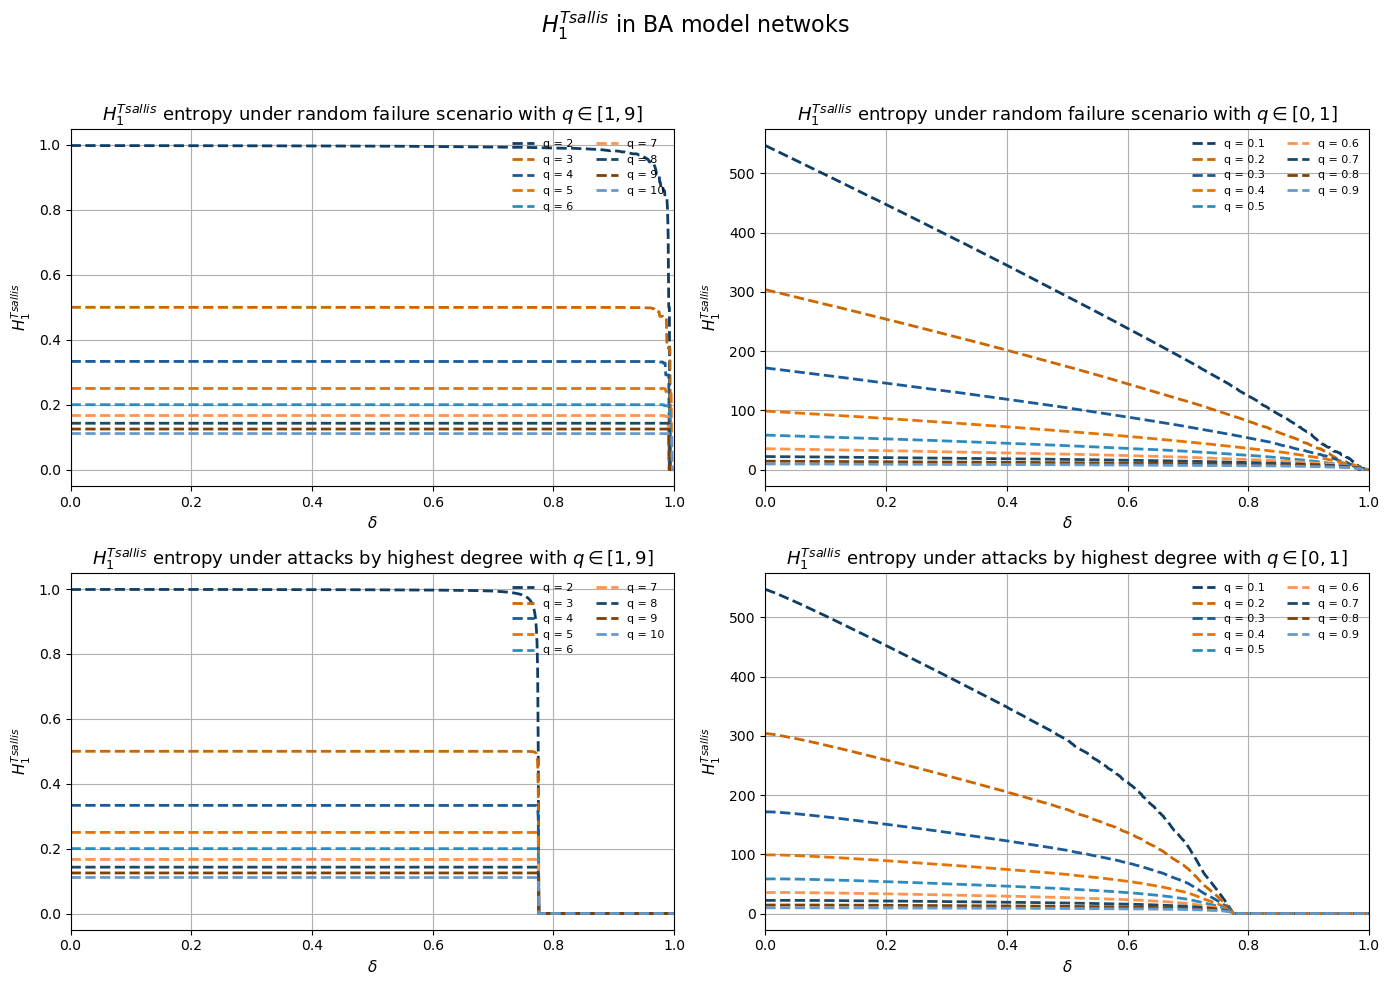

In [165]:
mapa_q_enteros = {i+1: q for i, q in enumerate(q_enteros)}
mapa_q_decimales = {i+1: q for i, q in enumerate(q_decimales)}
datos = {
    r"$H_1^{Tsallis}$ entropy under random failure scenario with $q \in [1,9]$": {
        "WS": tsallis_1_BA_fallos_enteros,
        "q_map": mapa_q_enteros
    },
    r"$H_1^{Tsallis}$ entropy under random failure scenario with $q \in [0,1]$": {
        "WS": tsallis_1_BA_fallos_decimales,
        "q_map": mapa_q_decimales
    },
    r"$H_1^{Tsallis}$ entropy under attacks by highest degree with $q \in [1,9]$": {
        "WS": tsallis_1_BA_ataques_enteros,
        "q_map": mapa_q_enteros
    },
    r"$H_1^{Tsallis}$ entropy under attacks by highest degree with $q \in [0,1]$": {
        "WS": tsallis_1_BA_ataques_decimales,
        "q_map": mapa_q_decimales
    }
}
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
subplot_titulos = list(datos.keys())
ejes = axs.flatten()
for ax, titulo in zip(ejes, subplot_titulos):
    contenido = datos[titulo]
    tsallis_dict = contenido["WS"]
    q_map = contenido["q_map"]
    for idx, (q_idx, valores) in enumerate(tsallis_dict.items()):
        x = np.linspace(0, 1, len(valores))  # Eje x visual de 0 a 1
        color = custom_palette[idx % len(custom_palette)]
        q_valor = q_map[q_idx]
        etiqueta = f"q = {q_valor}"
        ax.plot(x, valores, label=etiqueta, color=color, linewidth=2, linestyle='--')
    ax.set_xlim(0, 1)
    ax.set_title(titulo, fontsize=13)
    ax.set_xlabel(r"$\delta$", fontsize=11)
    ax.set_ylabel(r"$H_1^{Tsallis}$", fontsize=11)
    ax.tick_params(axis='both', labelsize=10)
    ax.legend(fontsize=8, ncol=2, loc='upper right', frameon=False)
    ax.grid(True)
fig.suptitle(r'$H_1^{Tsallis}$ in BA model netwoks',fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('Tsallis entropy for BA model.png',dpi=300)
plt.show()

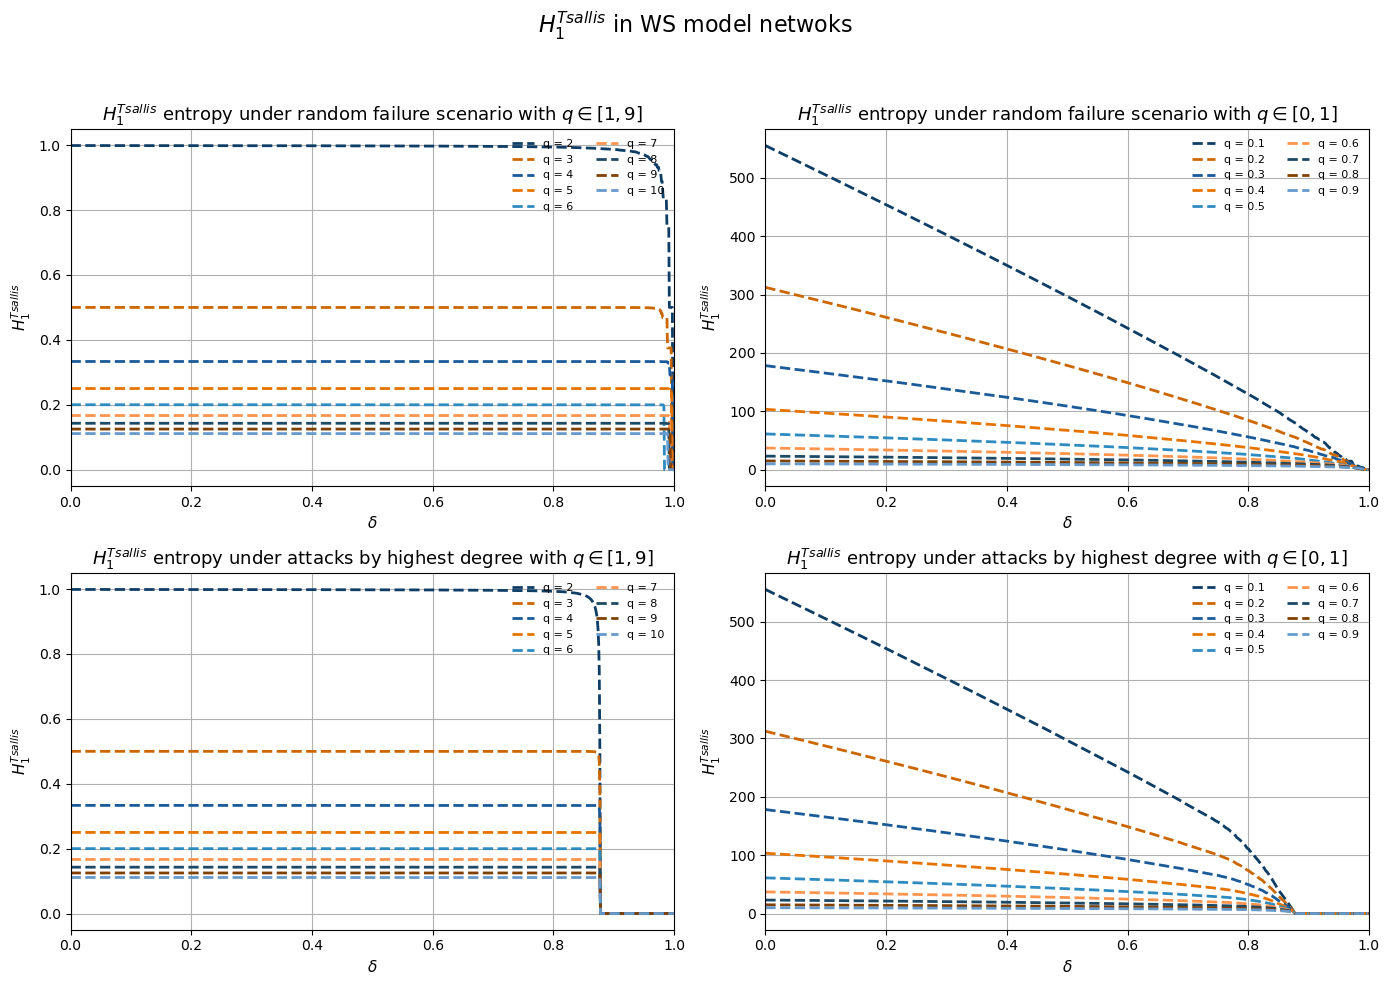

In [166]:
mapa_q_enteros = {i+1: q for i, q in enumerate(q_enteros)}
mapa_q_decimales = {i+1: q for i, q in enumerate(q_decimales)}
datos = {
    r"$H_1^{Tsallis}$ entropy under random failure scenario with $q \in [1,9]$": {
        "WS": tsallis_1_WS_fallos_enteros,
        "q_map": mapa_q_enteros
    },
    r"$H_1^{Tsallis}$ entropy under random failure scenario with $q \in [0,1]$": {
        "WS": tsallis_1_WS_fallos_decimales,
        "q_map": mapa_q_decimales
    },
    r"$H_1^{Tsallis}$ entropy under attacks by highest degree with $q \in [1,9]$": {
        "WS": tsallis_1_WS_ataques_enteros,
        "q_map": mapa_q_enteros
    },
    r"$H_1^{Tsallis}$ entropy under attacks by highest degree with $q \in [0,1]$": {
        "WS": tsallis_1_WS_ataques_decimales,
        "q_map": mapa_q_decimales
    }
}
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
subplot_titulos = list(datos.keys())
ejes = axs.flatten()
for ax, titulo in zip(ejes, subplot_titulos):
    contenido = datos[titulo]
    tsallis_dict = contenido["WS"]
    q_map = contenido["q_map"]
    for idx, (q_idx, valores) in enumerate(tsallis_dict.items()):
        x = np.linspace(0, 1, len(valores))  # Eje x visual de 0 a 1
        color = custom_palette[idx % len(custom_palette)]
        q_valor = q_map[q_idx]
        etiqueta = f"q = {q_valor}"
        ax.plot(x, valores, label=etiqueta, color=color, linewidth=2, linestyle='--')
    ax.set_xlim(0, 1)
    ax.set_title(titulo, fontsize=13)
    ax.set_xlabel(r"$\delta$", fontsize=11)
    ax.set_ylabel(r"$H_1^{Tsallis}$", fontsize=11)
    ax.tick_params(axis='both', labelsize=10)
    ax.legend(fontsize=8, ncol=2, loc='upper right', frameon=False)
    ax.grid(True)
fig.suptitle(r'$H_1^{Tsallis}$ in WS model netwoks',fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('Tsallis entropy for WS model.png',dpi=300)
plt.show()

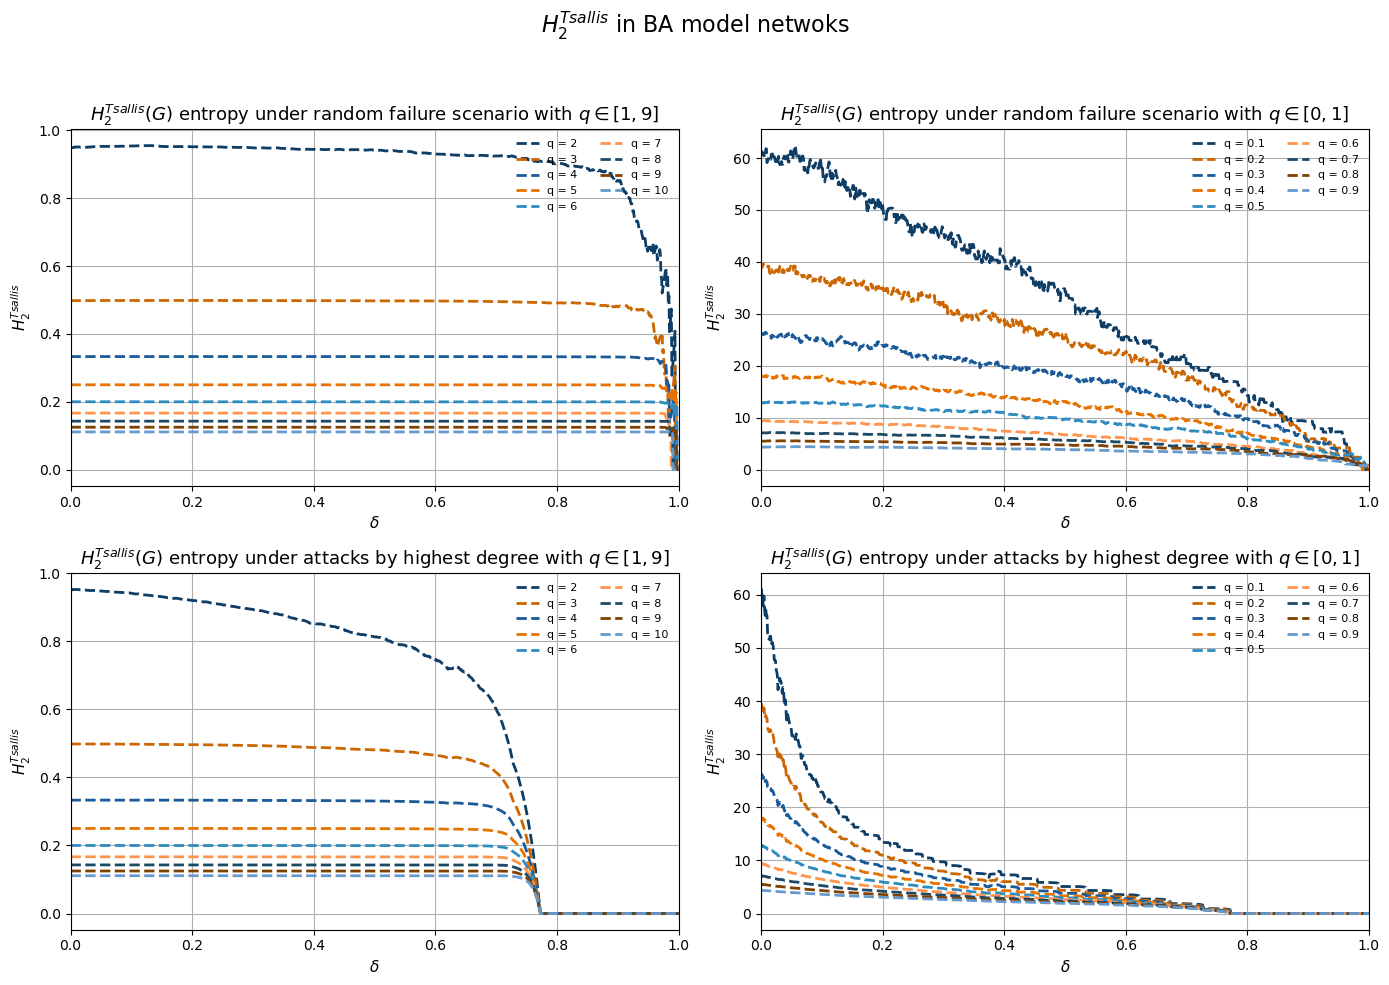

In [169]:
# Mapas para q
mapa_q_enteros = {i+1: q for i, q in enumerate(q_enteros)}
mapa_q_decimales = {i+1: q for i, q in enumerate(q_decimales)}

# Diccionario con resultados de Tsallis 2 y modelo BA
datos = {
    r"$H_2^{Tsallis}(G)$ entropy under random failure scenario with $q \in [1,9]$": {
        "BA": tsallis_2_BA_fallos_enteros,
        "q_map": mapa_q_enteros
    },
    r"$H_2^{Tsallis}(G)$ entropy under random failure scenario with $q \in [0,1]$": {
        "BA": tsallis_2_BA_fallos_decimales,
        "q_map": mapa_q_decimales
    },
    r"$H_2^{Tsallis}(G)$ entropy under attacks by highest degree with $q \in [1,9]$": {
        "BA": tsallis_2_BA_ataques_enteros,
        "q_map": mapa_q_enteros
    },
    r"$H_2^{Tsallis}(G)$ entropy under attacks by highest degree with $q \in [0,1]$": {
        "BA": tsallis_2_BA_ataques_decimales,
        "q_map": mapa_q_decimales
    }
}

# Preparar figura
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
subplot_titulos = list(datos.keys())
ejes = axs.flatten()

for ax, titulo in zip(ejes, subplot_titulos):
    contenido = datos[titulo]
    tsallis_dict = contenido["BA"]
    q_map = contenido["q_map"]
    
    for idx, (q_idx, valores) in enumerate(tsallis_dict.items()):
        x = np.linspace(0, 1, len(valores))
        color = custom_palette[idx % len(custom_palette)]
        q_valor = q_map[q_idx]
        etiqueta = f"q = {q_valor}"
        ax.plot(x, valores, label=etiqueta, color=color, linewidth=2, linestyle='--')
    
    ax.set_xlim(0, 1)
    ax.set_title(titulo, fontsize=13)
    ax.set_xlabel(r"$\delta$", fontsize=11)
    ax.set_ylabel(r"$H_2^{Tsallis}$", fontsize=11)
    ax.tick_params(axis='both', labelsize=10)
    ax.legend(fontsize=8, ncol=2, loc='upper right', frameon=False)
    ax.grid(True)

fig.suptitle(r'$H_2^{Tsallis}$ in BA model netwoks',fontsize=16)
plt.savefig('Tsallis_2 entropy for BA model.png',dpi=300)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

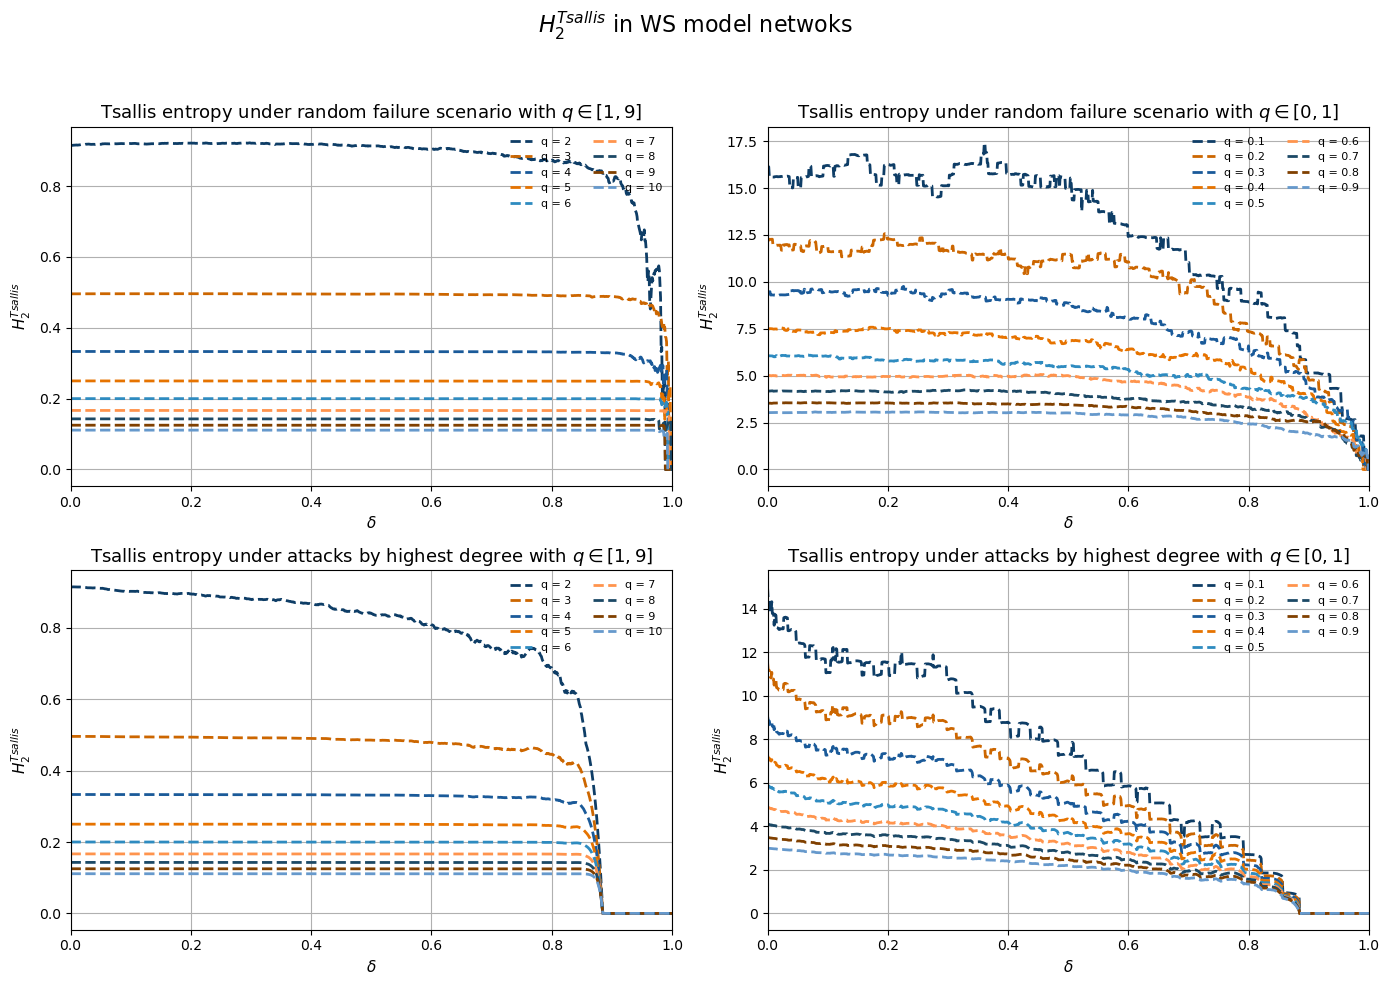

In [168]:
# Mapas para q
mapa_q_enteros = {i+1: q for i, q in enumerate(q_enteros)}
mapa_q_decimales = {i+1: q for i, q in enumerate(q_decimales)}

# Diccionario con resultados de Tsallis 2 y modelo WS
datos = {
    r"Tsallis entropy under random failure scenario with $q \in [1,9]$": {
        "WS": tsallis_2_WS_fallos_enteros,
        "q_map": mapa_q_enteros
    },
    r"Tsallis entropy under random failure scenario with $q \in [0,1]$": {
        "WS": tsallis_2_WS_fallos_decimales,
        "q_map": mapa_q_decimales
    },
    r"Tsallis entropy under attacks by highest degree with $q \in [1,9]$": {
        "WS": tsallis_2_WS_ataques_enteros,
        "q_map": mapa_q_enteros
    },
    r"Tsallis entropy under attacks by highest degree with $q \in [0,1]$": {
        "WS": tsallis_2_WS_ataques_decimales,
        "q_map": mapa_q_decimales
    }
}

# Preparar figura
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
subplot_titulos = list(datos.keys())
ejes = axs.flatten()

for ax, titulo in zip(ejes, subplot_titulos):
    contenido = datos[titulo]
    tsallis_dict = contenido["WS"]
    q_map = contenido["q_map"]
    
    for idx, (q_idx, valores) in enumerate(tsallis_dict.items()):
        x = np.linspace(0, 1, len(valores))
        color = custom_palette[idx % len(custom_palette)]
        q_valor = q_map[q_idx]
        etiqueta = f"q = {q_valor}"
        ax.plot(x, valores, label=etiqueta, color=color, linewidth=2, linestyle='--')
    
    ax.set_xlim(0, 1)
    ax.set_title(titulo, fontsize=13)
    ax.set_xlabel(r"$\delta$", fontsize=11)
    ax.set_ylabel(r"$H_2^{Tsallis}$", fontsize=11)
    ax.tick_params(axis='both', labelsize=10)
    ax.legend(fontsize=8, ncol=2, loc='upper right', frameon=False)
    ax.grid(True)

fig.suptitle(r'$H_2^{Tsallis}$ in WS model netwoks',fontsize=16)
plt.savefig('Tsallis_2 entropy for WS model.png',dpi=300)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [31]:
num_simulaciones=5

In [32]:
N = 1000

inicio = time.time()

tsallis_1_BA_fallos = []
tsallis_1_WS_fallos = []

f_1 = lambda G: en.entropia_tsallis_1(G,2)

for i in range(num_simulaciones):
    print(f"estamos en la {i} simulación")
    G_BA = g.crear_grafica('barabasi',1000,15,0)
    G_WS = g.crear_grafica('watts',1000,30,0.5)
    IR_BA = []
    IR_WS = []
    for j in range(1,N,1):
        G_1 = G_BA.copy()
        G_2 = G_WS.copy()
        IR_BA.append(g.indice_robustez(G_1,f_1,2,'random',j))
        IR_WS.append(g.indice_robustez(G_2,f_1,2,'random',j))
    tsallis_1_BA_fallos.append(IR_BA)
    tsallis_1_WS_fallos.append(IR_WS)

final = time.time()

print(f"El tiempo de ejecución fue de: {final - inicio}")

estamos en la 0 simulación
estamos en la 1 simulación
estamos en la 2 simulación
estamos en la 3 simulación
estamos en la 4 simulación
El tiempo de ejecución fue de: 2513.52255487442


In [33]:
N = 1000

inicio = time.time()

tsallis_1_BA_ataques = []
tsallis_1_WS_ataques = []

f_1 = lambda G: en.entropia_tsallis_1(G,2)

for i in range(num_simulaciones):
    print(f"estamos en la {i} simulación")
    G_BA = g.crear_grafica('barabasi',1000,15,0)
    G_WS = g.crear_grafica('watts',1000,30,0.5)
    IR_BA = []
    IR_WS = []
    for j in range(1,N,1):
        G_1 = G_BA.copy()
        G_2 = G_WS.copy()
        IR_BA.append(g.indice_robustez(G_1,f_1,2,'degree',j))
        IR_WS.append(g.indice_robustez(G_2,f_1,2,'degree',j))
    tsallis_1_BA_ataques.append(IR_BA)
    tsallis_1_WS_ataques.append(IR_WS)

final = time.time()

print(f"El tiempo de ejecución fue de: {final - inicio}")

estamos en la 0 simulación
estamos en la 1 simulación
estamos en la 2 simulación
estamos en la 3 simulación
estamos en la 4 simulación
El tiempo de ejecución fue de: 22509.178296804428


In [34]:
resultados_tsallis_1_BA_fallos = [sum(col)/num_simulaciones for col in zip(*tsallis_1_BA_fallos)]
resultados_tsallis_1_WS_fallos = [sum(col)/num_simulaciones for col in zip(*tsallis_1_WS_fallos)]

resultados_tsallis_1_BA_ataques = [sum(col)/num_simulaciones for col in zip(*tsallis_1_BA_ataques)]
resultados_tsallis_1_WS_ataques = [sum(col)/num_simulaciones for col in zip(*tsallis_1_WS_ataques)]

In [35]:

inicio = time.time()

tsallis_2_BA_fallos = []
tsallis_2_WS_fallos = []

f_1 = lambda G: en.entropia_tsallis_2(G,2)

for i in range(num_simulaciones):
    print(f"estamos en la {i} simulación")
    G_BA = g.crear_grafica('barabasi',1000,15,0)
    G_WS = g.crear_grafica('watts',1000,30,0.5)
    IR_BA = []
    IR_WS = []
    for j in range(1,N,1):
        G_1 = G_BA.copy()
        G_2 = G_WS.copy()
        IR_BA.append(g.indice_robustez(G_1,f_1,2,'random',j))
        IR_WS.append(g.indice_robustez(G_2,f_1,2,'random',j))
    tsallis_2_BA_fallos.append(IR_BA)
    tsallis_2_WS_fallos.append(IR_WS)

final = time.time()

print(f"El tiempo de ejecución fue de: {final - inicio}")

estamos en la 0 simulación
estamos en la 1 simulación
estamos en la 2 simulación
estamos en la 3 simulación
estamos en la 4 simulación
El tiempo de ejecución fue de: 1855.3176052570343


In [36]:
N = len(G_BA)

inicio = time.time()

tsallis_2_BA_ataques = []
tsallis_2_WS_ataques = []

f_1 = lambda G: en.entropia_tsallis_2(G,2)

for i in range(num_simulaciones):
    print(f"estamos en la {i} simulación")
    G_BA = g.crear_grafica('barabasi',1000,15,0)
    G_WS = g.crear_grafica('watts',1000,30,0.5)
    IR_BA = []
    IR_WS = []
    for j in range(1,N,1):
        G_1 = G_BA.copy()
        G_2 = G_WS.copy()
        IR_BA.append(g.indice_robustez(G_1,f_1,2,'degree',j))
        IR_WS.append(g.indice_robustez(G_2,f_1,2,'degree',j))
    tsallis_2_BA_ataques.append(IR_BA)
    tsallis_2_WS_ataques.append(IR_WS)

final = time.time()

print(f"El tiempo de ejecución fue de: {final - inicio}")

estamos en la 0 simulación
estamos en la 1 simulación
estamos en la 2 simulación
estamos en la 3 simulación
estamos en la 4 simulación
El tiempo de ejecución fue de: 4201.0513343811035


In [37]:
resultados_tsallis_2_BA_fallos = [sum(col)/num_simulaciones for col in zip(*tsallis_2_BA_fallos)]
resultados_tsallis_2_WS_fallos = [sum(col)/num_simulaciones for col in zip(*tsallis_2_WS_fallos)]

resultados_tsallis_2_BA_ataques = [sum(col)/num_simulaciones for col in zip(*tsallis_2_BA_ataques)]
resultados_tsallis_2_WS_ataques = [sum(col)/num_simulaciones for col in zip(*tsallis_2_WS_ataques)]

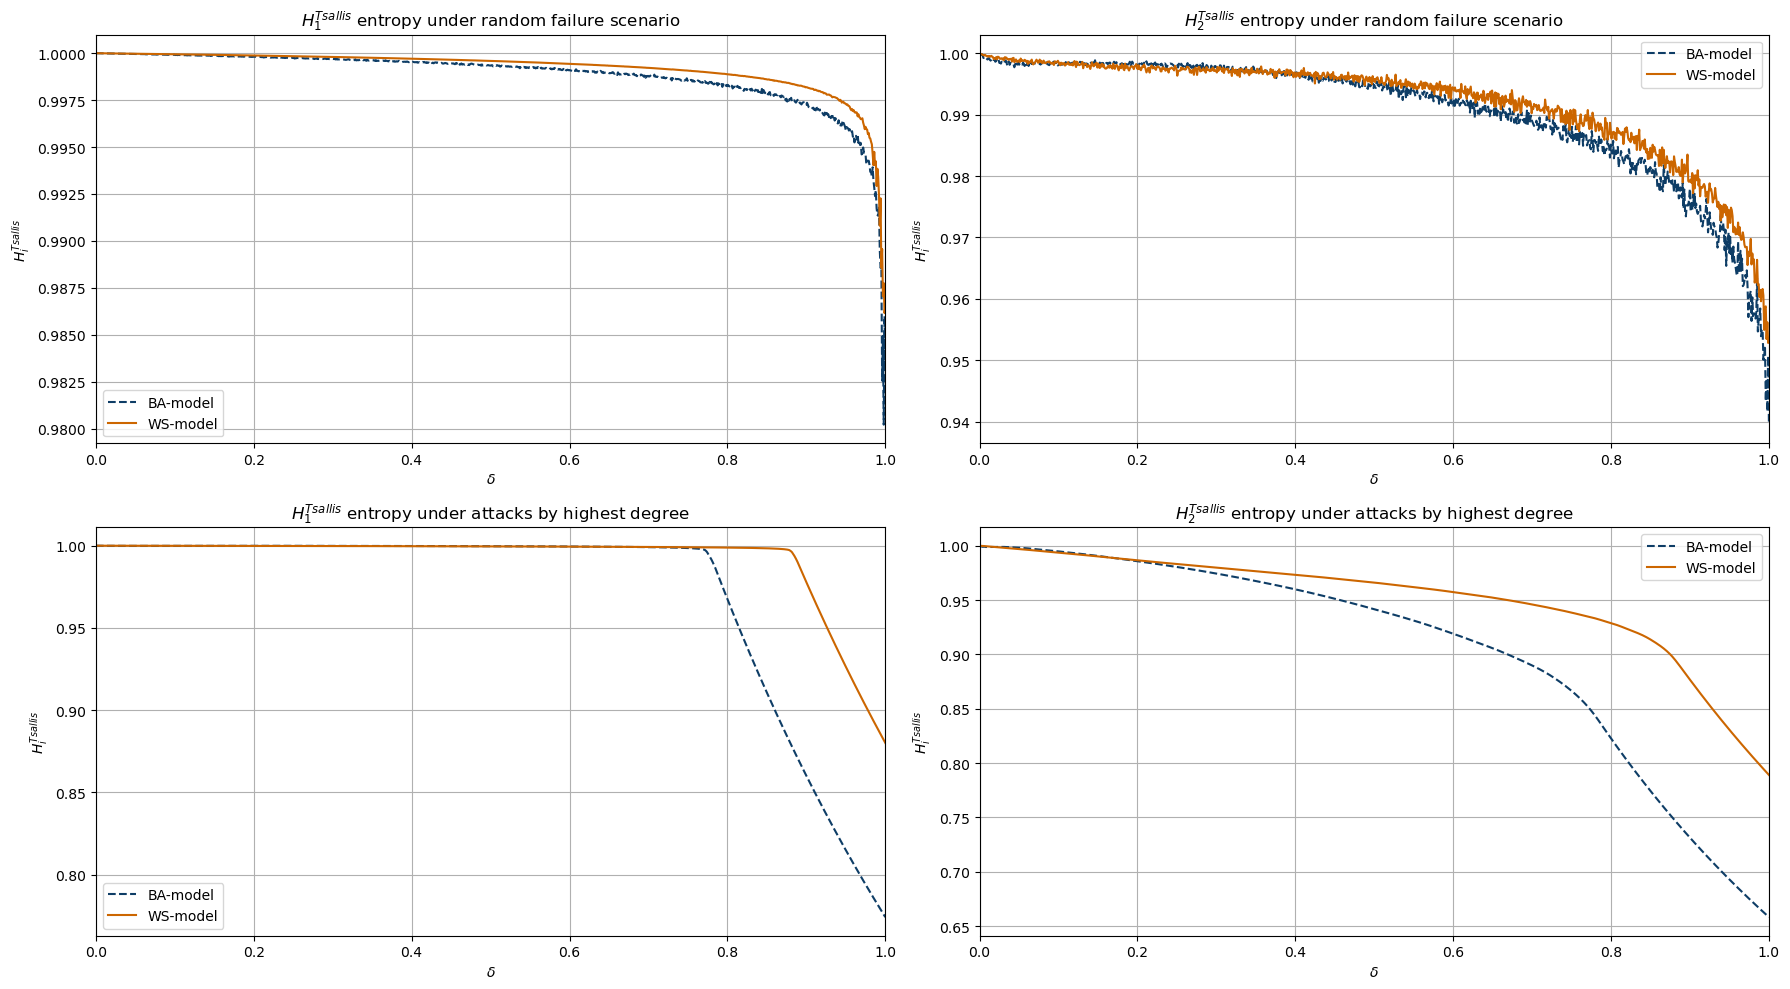

In [40]:
blue_dark = "#0e3d66"    # Para BA
orange_dark = "#cc6600"  # Para WS

# Asumiendo que todas las listas tienen la misma longitud
delta = np.linspace(0, 1, len(resultados_tsallis_1_BA_fallos))

# Crear figura y ejes
fig, axs = plt.subplots(2, 2, figsize=(18, 10))
axs = axs.flatten()

# Lista de datos: (BA, WS, título)
graficas = [
    (resultados_tsallis_1_BA_fallos, resultados_tsallis_1_WS_fallos, 
     r"$H_1^{Tsallis}$ entropy under random failure scenario"),
    
    (resultados_tsallis_2_BA_fallos, resultados_tsallis_2_WS_fallos, 
     r"$H_2^{Tsallis}$ entropy under random failure scenario"),
    
    (resultados_tsallis_1_BA_ataques, resultados_tsallis_1_WS_ataques, 
     r"$H_1^{Tsallis}$ entropy under attacks by highest degree"),
    
    (resultados_tsallis_2_BA_ataques, resultados_tsallis_2_WS_ataques, 
     r"$H_2^{Tsallis}$ entropy under attacks by highest degree"),
]

# Graficar cada subplot
for i, (ba, ws, titulo) in enumerate(graficas):
    ax = axs[i]
    ax.plot(delta, ba, label="BA-model", color=blue_dark, linestyle='--')
    ax.plot(delta, ws, label="WS-model", color=orange_dark)
    ax.set_title(titulo, fontsize=12)
    ax.set_xlabel(r"$\delta$")
    ax.set_ylabel(r"$H_i^{Tsallis}$")
    ax.set_xlim(0, 1)
    ax.legend()
    ax.grid(True)

# Ajustar diseño y guardar figura
plt.tight_layout()
plt.savefig("tsallis_entropy_IR.png", dpi=300)
plt.show()